# Load all features and run lasso regression

### Load all features and combine them¶

- Answers to 60 questions

- Tenure of key employees in the care center

- Median household income at each location

- Median salary at each location

- Measure of variability in the answers

### Run lasso regression 1000 times

- Split the data to test and train 1000 times and run lasso regression (with cross validation for the best alpha to use)

- Find the distribution of coefficient of determination and weight.

### Save the output data (as .pkl file)

- Save the combined features and the results from the lasso regression.

In [1]:
import numpy as np
import pandas as pd
import os


import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
color = sb.color_palette()
import matplotlib as mpl

%matplotlib inline

import pickle

from sklearn import preprocessing as pp 
#import the entire linear model
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr 
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV

from scipy.stats import wilcoxon

### Load all the features

In [2]:
feature_set = pd.read_pickle("./feature_set.pkl")
turnOverRate = pd.read_pickle("./turnOverRate.pkl")
LocationCodeComprehensive = pd.read_pickle("./LocationCodeComprehensive.pkl")
location_pay = pd.read_pickle("./location_pay.pkl")
location_sd = pd.read_pickle("./location_sdS_df.pkl")

### Run Lasso regression 1000 times (with cross validation)

In [3]:
# Try running the cross validation Lasso for different train test split and get the
#mean r-squared, alpha, and weights. 

all_features = pd.concat([feature_set,location_pay,location_sd], axis = 1)

xCV = all_features
yCV = turnOverRate #Turn over

train_number = 1000
#Run this part for 1000 times and get the values for r-squared, alpha, and the weights.
#reg.alpha_, reg.coef_, r2score.

#initialize
test_r_squared = np.zeros((train_number,1))
lasso_alpha = np.zeros((train_number,1))
lasso_coef = np.zeros((train_number,all_features.shape[1]))

for trialNo in range(train_number):
    
    #split 80-20
    XCV_train, XCV_test, YCV_train, YCV_test = train_test_split(xCV, yCV, test_size=0.2)

    reg = LassoCV(cv=5).fit(XCV_train, YCV_train)

    YpredLassoCV = reg.predict(XCV_test)
    test_r_squared[trialNo] = r2_score(YCV_test, YpredLassoCV)
    lasso_alpha[trialNo] = reg.alpha_
    lasso_coef[trialNo,:] = reg.coef_ 


### Save the results

In [4]:
with open('lasso_output.pickle', 'wb') as f:
    pickle.dump([test_r_squared, lasso_alpha, lasso_coef], f)

In [5]:
#Save features
feature_set.to_pickle("./feature_set.pkl")

### Plot the distribution of the coefficient of determination

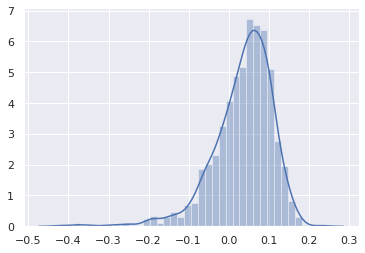

In [6]:
#Distribution of coefficient of determination
test_r_squared_df=pd.DataFrame(data=test_r_squared)
test_r_squared_df.rename(columns = {0:'coefficient of determination'}, inplace = True) 

sb.distplot(test_r_squared_df)
sb.despine()

In [7]:
#Check the statistical significance
sum_ranks, pval_w = wilcoxon(test_r_squared[:,0])
print(pval_w)

3.830100814603451e-56


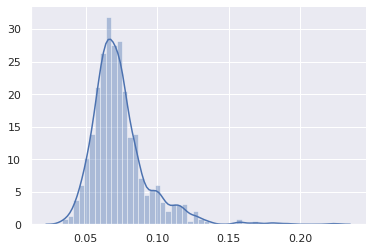

In [8]:
#Plot the alpha value for the 1000 lasso regression
lasso_alpha_df = pd.DataFrame(data=lasso_alpha)
lasso_coef_df = pd.DataFrame(data=lasso_coef)

sb.distplot(lasso_alpha_df)
sb.despine()

### Plot the mean coefficient for each feature.

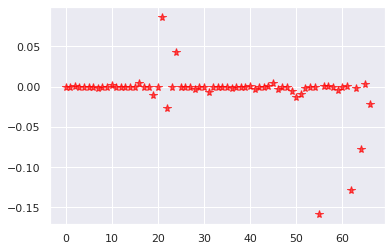

In [12]:
mean_coef=lasso_coef_df.mean()

plt.plot(mean_coef,alpha=0.7,linestyle='none',marker='*',markersize=8,color='red') 